In [187]:
import os
import sys

In [188]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [189]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter

In [190]:
### Constants
OUTPUT_DIR = "output"
JOB = "SSMP01"
JOB_TEXT = "Medico"
YEAR = "2022"

In [191]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [192]:
REGION_COLOURS = {
    "Nord": "#2a9d8f", 
    "Centro": "#e76f51",
    "Sud e Isole": "#e9c46a",
}

In [193]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

# prepare dataframe

In [194]:
df = pd.read_csv(
    '../datasets/C_17_dataset_188_0_upFile.csv',
    delimiter=";",
    keep_default_na=False)

In [195]:
df

,ANNO DI RIFERIMENTO,CODICE REGIONE,DENOMINAZIONE REGIONE,CODICE AZIENDA,DENOMINAZIONE AZIENDA,CODICE SERD,DENOMINAZIONE SERD,CODICE QUALIFICA,DESCRIZIONE QUALIFICA,NUM. DIP. TEMPO PIENO,...,NUM. DIP. PART TIME OLTRE 50%,NUM. DIP. PART TIME OLTRE 50% U,NUM. DIP. PART TIME OLTRE 50% D,PERSONALE DIPENDENTE,PERSONALE DIPENDENTE U,PERSONALE DIPENDENTE D,ALTRO RAPPORTO,ALTRO RAPPORTO U,ALTRO RAPPORTO D,"TOTALE PERSONALE,,"
0,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,ASMP01,PERSONALE AMMINISTRATIVO,1,...,0,0,0,1,0,1,0,0,0,"1,,"
1,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SMS046,DI CUI PSICHIATRI,1,...,0,0,0,1,0,1,0,0,0,"1,,"
2,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP01,MEDICO,2,...,0,0,0,2,0,2,0,0,0,"2,,"
3,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP03,PERSONALE INFERMIERISTICO,3,...,0,0,0,4,0,4,0,0,0,"4,,"
4,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP05,EDUCATORE PROFESSIONALE,5,...,0,0,0,5,1,4,0,0,0,"5,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,,,,,,,,,,,...,,,,,,,,,,",,"
2847,,,,,,,,,,,...,,,,,,,,,,",,"
2848,,,,,,,,,,,...,,,,,,,,,,",,"
2849,,,,,,,,,,,...,,,,,,,,,,",,"


In [196]:
df["DENOMINAZIONE REGIONE"].unique()

array(['PIEMONTE             ', 'VALLE D`AOSTA        ',
       'LOMBARDIA            ', 'PROV. AUTON. BOLZANO ',
       'PROV. AUTON. TRENTO  ', 'VENETO               ',
       'FRIULI VENEZIA GIULIA', 'LIGURIA              ',
       'EMILIA ROMAGNA       ', 'TOSCANA              ',
       'UMBRIA               ', 'MARCHE               ',
       'LAZIO                ', 'ABRUZZO              ',
       'MOLISE               ', 'CAMPANIA             ',
       'PUGLIA               ', '', 'BASILICATA           ',
       'CALABRIA             ', 'SICILIA              ',
       'SARDEGNA             '], dtype=object)

In [197]:
formatter = region_formatter.RegionFormatter(df)

In [198]:
formatter.format("DENOMINAZIONE REGIONE")

In [199]:
df["DENOMINAZIONE REGIONE"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', '', 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

In [200]:
df = df.rename(columns={
    "DENOMINAZIONE REGIONE": "reg_name",
    "TOTALE PERSONALE,,": "tot_personal"
})

In [201]:
df["tot_personal"] = df["tot_personal"].map(lambda x: x.replace(",", ""))

In [202]:
df["tot_personal"].unique()

array(['1', '2', '4', '5', '3', '7', '8', '6', '9', '12', '0', '13', '11',
       '14', '18', '34', '15', '10', '16', ''], dtype=object)

In [203]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [204]:
df["tot_personal"] = df["tot_personal"].astype(float)

In [205]:
df.columns

Index(['ANNO DI RIFERIMENTO', 'CODICE REGIONE', 'reg_name', 'CODICE AZIENDA',
       'DENOMINAZIONE AZIENDA', 'CODICE SERD', 'DENOMINAZIONE SERD',
       'CODICE QUALIFICA', 'DESCRIZIONE QUALIFICA', 'NUM. DIP. TEMPO PIENO',
       'NUM. DIP. TEMPO PIENO U', 'NUM. DIP. TEMPO PIENO D',
       'NUM. DIP. PART TIME FINO 50%', 'NUM. DIP. PART TIME FINO 50% U',
       'NUM. DIP. PART TIME FINO 50% D', 'NUM. DIP. PART TIME OLTRE 50%',
       'NUM. DIP. PART TIME OLTRE 50% U', 'NUM. DIP. PART TIME OLTRE 50% D',
       'PERSONALE DIPENDENTE', 'PERSONALE DIPENDENTE U',
       'PERSONALE DIPENDENTE D', 'ALTRO RAPPORTO', 'ALTRO RAPPORTO U',
       'ALTRO RAPPORTO D', 'tot_personal'],
      dtype='object')

In [206]:
df["reg_name"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', nan, 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

# Prepare geodataframe

In [207]:
if not os.path.exists("regions_df.pkl"):
    %run ../dataframes/regions_gdf.ipynb -i

In [208]:
regions_df = pd.read_pickle("regions_df.pkl")

In [209]:
regions_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro


In [210]:
regions_df["reg_name"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

# MD Data

In [211]:
df_job = df.loc[df["CODICE QUALIFICA"] == JOB, ["reg_name",  "tot_personal"] ]

In [212]:
df_job

,reg_name,tot_personal
2,piemonte,2.0
8,piemonte,2.0
13,piemonte,2.0
17,piemonte,2.0
30,piemonte,1.0
...,...,...
2796,sardegna,2.0
2803,sardegna,3.0
2810,sardegna,5.0
2818,sardegna,7.0


In [213]:
df_job.columns

Index(['reg_name', 'tot_personal'], dtype='object')

In [214]:
df_serd_count = df_job.groupby(["reg_name"])["reg_name"].count().reset_index(name="serd_count")

In [215]:
df_job = df_job.groupby([
    'reg_name',
]).sum().reset_index()

In [216]:
gdf_job = regions_df.merge(df_job, on="reg_name")

In [217]:
gdf_job = gdf_job.merge(df_serd_count, on="reg_name")

In [218]:
gdf_job["personal_avg"] = gdf_job["tot_personal"] / gdf_job["serd_count"] 

In [219]:
gdf_job

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone,tot_personal,serd_count,personal_avg
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord,127.0,52,2.442308
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord,2.0,1,2.000000
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord,221.0,79,2.797468
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord,20.0,4,5.000000
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord,68.0,29,2.344828
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord,32.0,6,5.333333
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord,43.0,14,3.071429
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro,98.0,37,2.648649
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro,105.0,36,2.916667
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro,22.0,9,2.444444


In [220]:
plot_title = "Totale Personale {} per SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

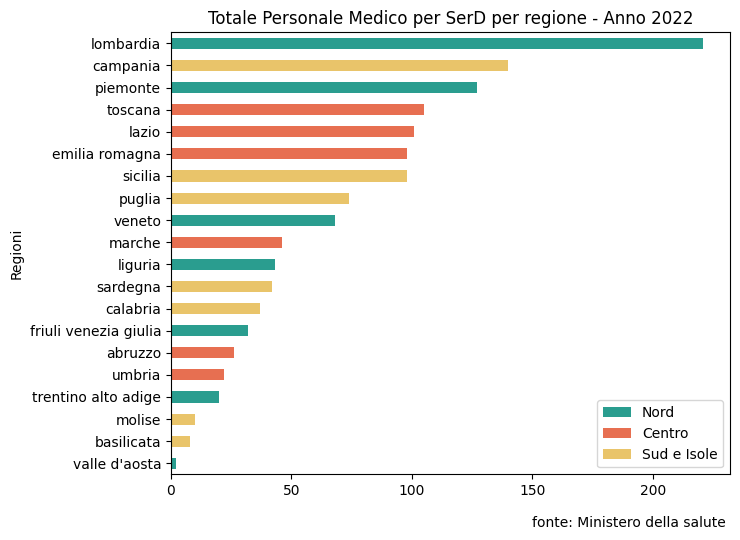

In [221]:
gdf_job.sort_values(by=['tot_personal']).plot.barh(
    y="tot_personal",
    x="reg_name",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_job.sort_values(by=['tot_personal'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [222]:
plot_title = "Totale personale medico per SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

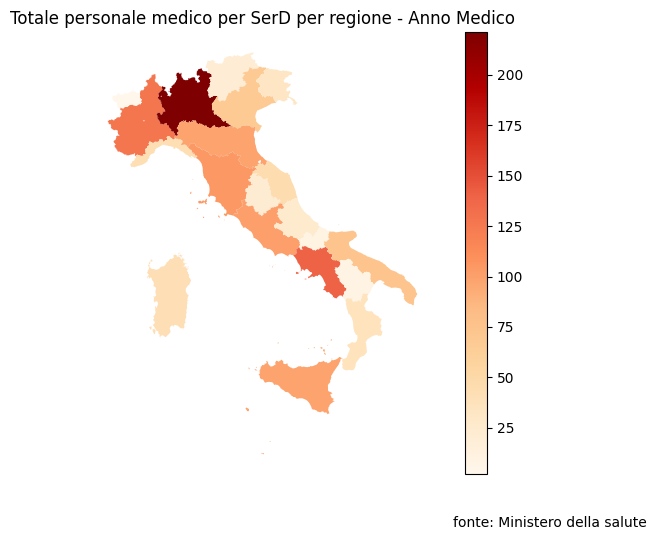

In [223]:
plot_job = gdf_job.plot(
    column="tot_personal",
    legend=True,
    cmap='OrRd'
);
plt.title(plot_title)
plot_job.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [224]:
plot_job.get_figure().savefig('output/plot_job.png')

In [225]:
plot_title = "Media personale medico per SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

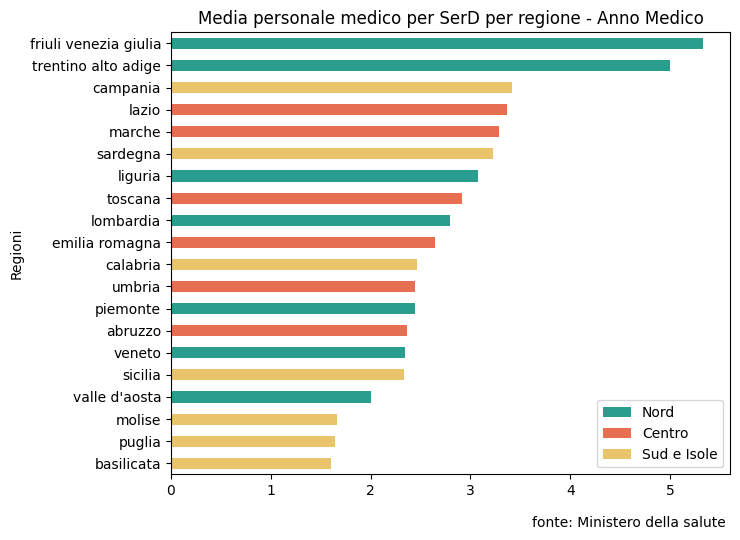

In [226]:
gdf_job.sort_values(by=['personal_avg']).plot.barh(
    y="personal_avg",
    x="reg_name",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_job.sort_values(by=['personal_avg'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

Text(260, -30, 'fonte: Ministero della salute')

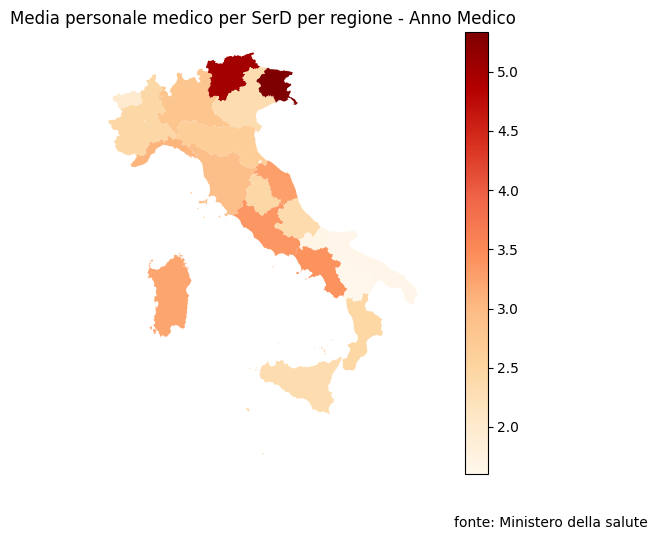

In [227]:
plot_job = gdf_job.plot(
    column="personal_avg",
    legend=True,
    cmap='OrRd'
);
plt.title(plot_title)
plot_job.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')